In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


In [60]:
data = pd.read_csv(r"C:\Users\Kishore kumar\Downloads\AncillaryScoring_insurance.csv\AncillaryScoring_insurance.csv",encoding="ISO-8859-1")

In [61]:
data.shape

(50000, 15)

In [62]:
for i in data.columns:
    print("Unique values in",i,":",data[i].unique(), data[i].nunique())

Unique values in Id : [    1     2     3 ... 49998 49999 50000] 50000
Unique values in PAXCOUNT : [2 1 3 4 6 5 7 9 8] 9
Unique values in SALESCHANNEL : ['Internet' 'Mobile'] 2
Unique values in TRIPTYPEDESC : ['RoundTrip' 'CircleTrip' 'OneWay'] 3
Unique values in PURCHASELEAD : [262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 

## Univariate Analysis

<Axes: xlabel='INS_FLAG', ylabel='count'>

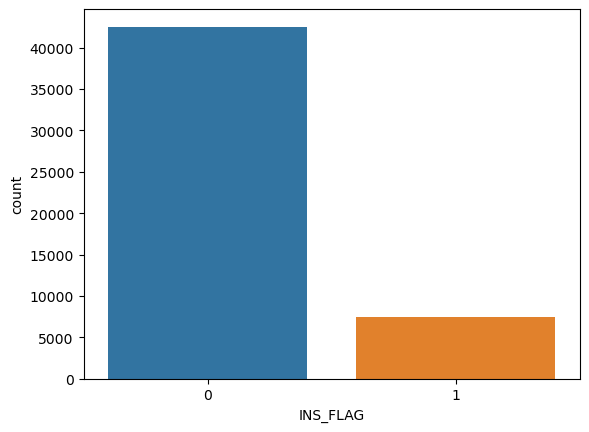

In [63]:
sns.countplot(x="INS_FLAG", data = data)

<Axes: xlabel='TRIPTYPEDESC', ylabel='count'>

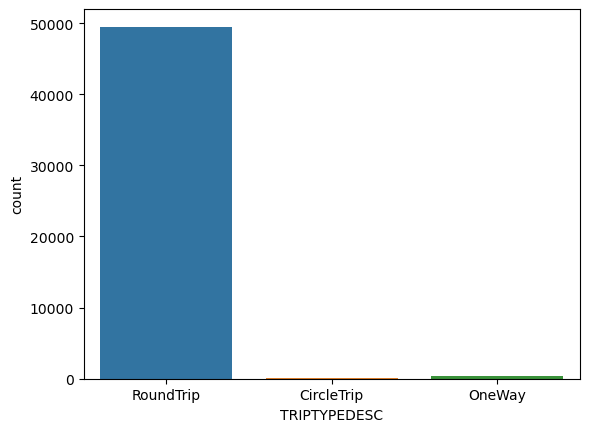

In [64]:
sns.countplot(x="TRIPTYPEDESC", data = data)

<Axes: xlabel='SALESCHANNEL', ylabel='count'>

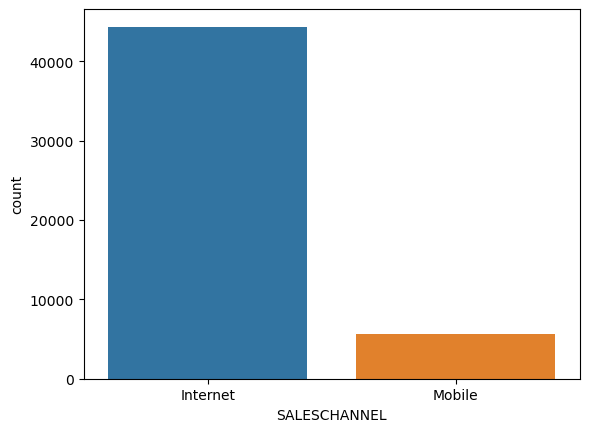

In [65]:
sns.countplot(x="SALESCHANNEL", data = data)

<Axes: xlabel='flight_day', ylabel='count'>

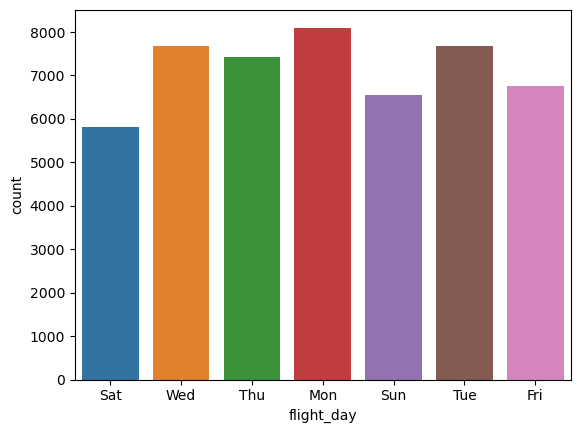

In [66]:
sns.countplot(x="flight_day", data = data)

<Axes: xlabel='flight_hour', ylabel='count'>

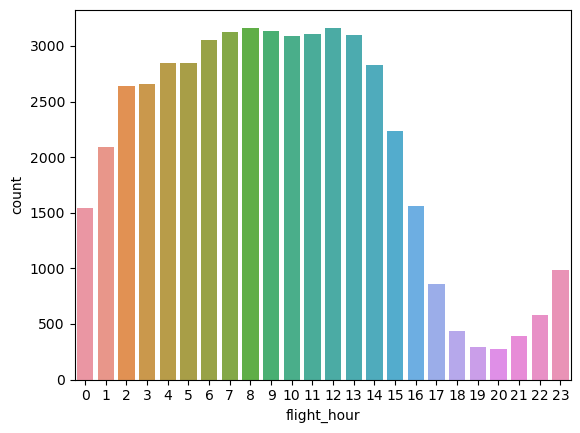

In [67]:
sns.countplot(x="flight_hour", data = data)

<Axes: xlabel='flightDuration_hour', ylabel='count'>

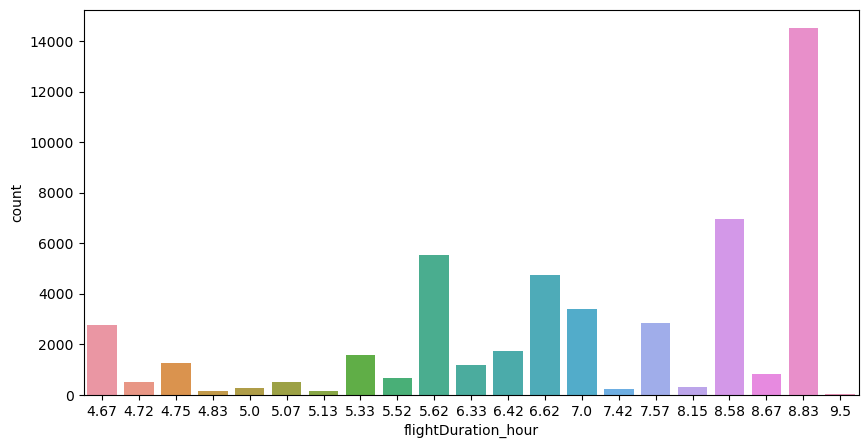

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="flightDuration_hour", data = data, ax=ax)

<Axes: xlabel='BAGGAGE_CATEGORY', ylabel='count'>

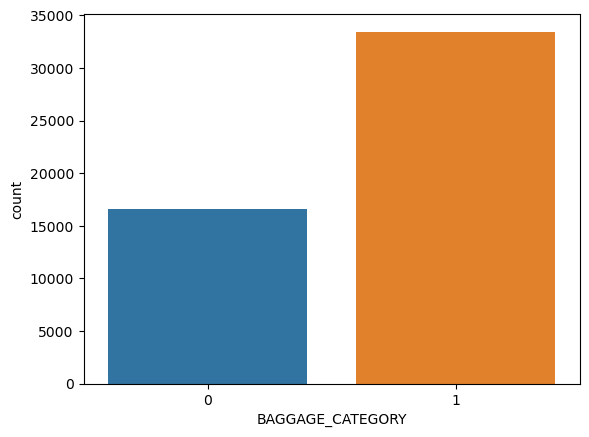

In [69]:
sns.countplot(x="BAGGAGE_CATEGORY", data = data)

<Axes: xlabel='FNB_CATEGORY', ylabel='count'>

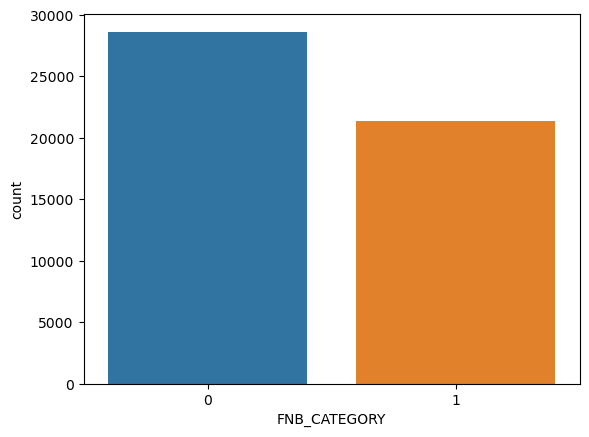

In [70]:
sns.countplot(x="FNB_CATEGORY", data = data)

<Axes: xlabel='SEAT_CATEGORY', ylabel='count'>

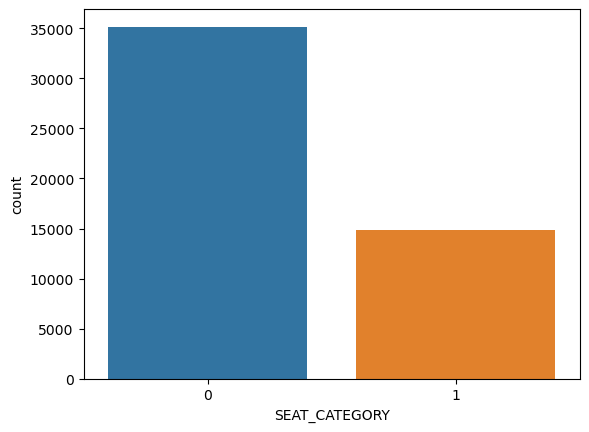

In [71]:
sns.countplot(x="SEAT_CATEGORY", data = data)

In [72]:
data.columns

Index(['Id', 'PAXCOUNT', 'SALESCHANNEL', 'TRIPTYPEDESC', 'PURCHASELEAD',
       'LENGTHOFSTAY', 'flight_hour', 'flight_day', 'ROUTE',
       'geoNetwork_country', 'BAGGAGE_CATEGORY', 'SEAT_CATEGORY',
       'FNB_CATEGORY', 'INS_FLAG', 'flightDuration_hour'],
      dtype='object')

## Bivariate Analysis

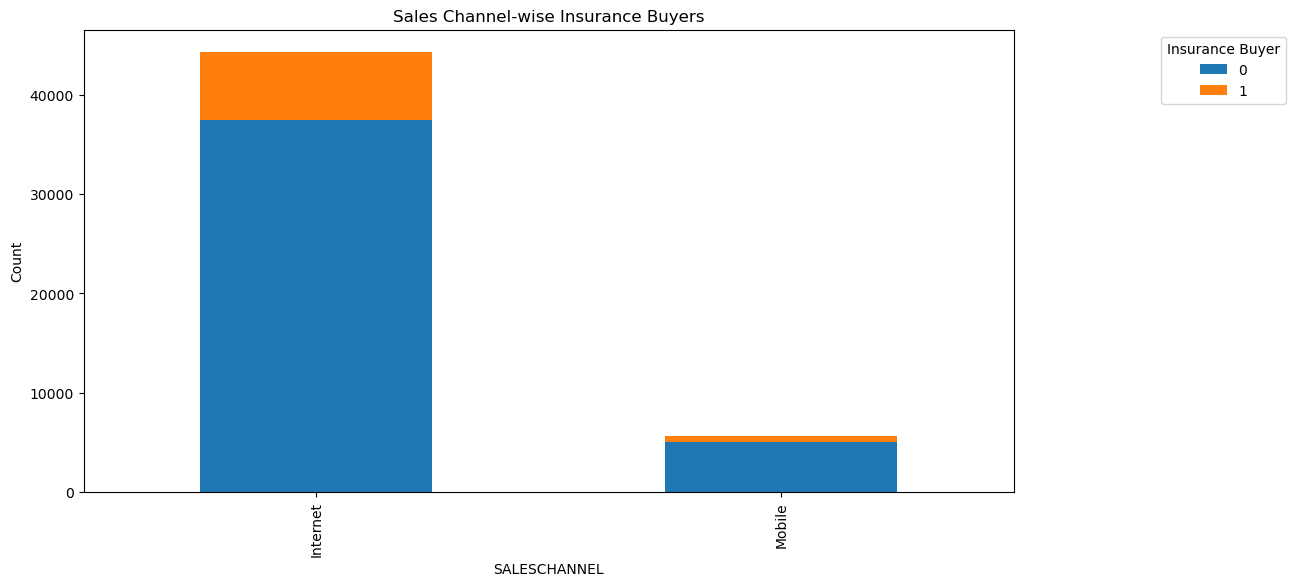

In [73]:
SalesChannel_INS_FLAG = data.groupby(['SALESCHANNEL', 'INS_FLAG']).size().unstack(fill_value=0)

# Plot the data
SalesChannel_INS_FLAG.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales Channel-wise Insurance Buyers')
plt.xlabel('SALESCHANNEL')
plt.ylabel('Count')
plt.legend(title='Insurance Buyer', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

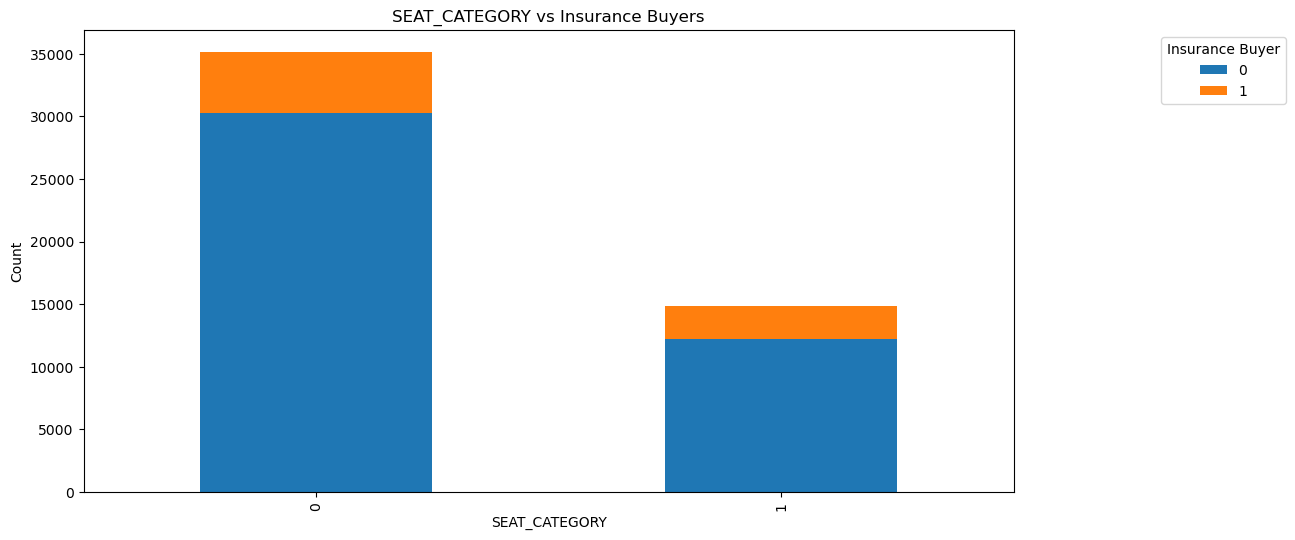

In [52]:
SEAT_INS_FLAG = data.groupby(['SEAT_CATEGORY','INS_FLAG']).size().unstack(fill_value=0)

# Plot the data
SEAT_INS_FLAG.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('SEAT_CATEGORY vs Insurance Buyers')
plt.xlabel('SEAT_CATEGORY')
plt.ylabel('Count')
plt.legend(title='Insurance Buyer', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

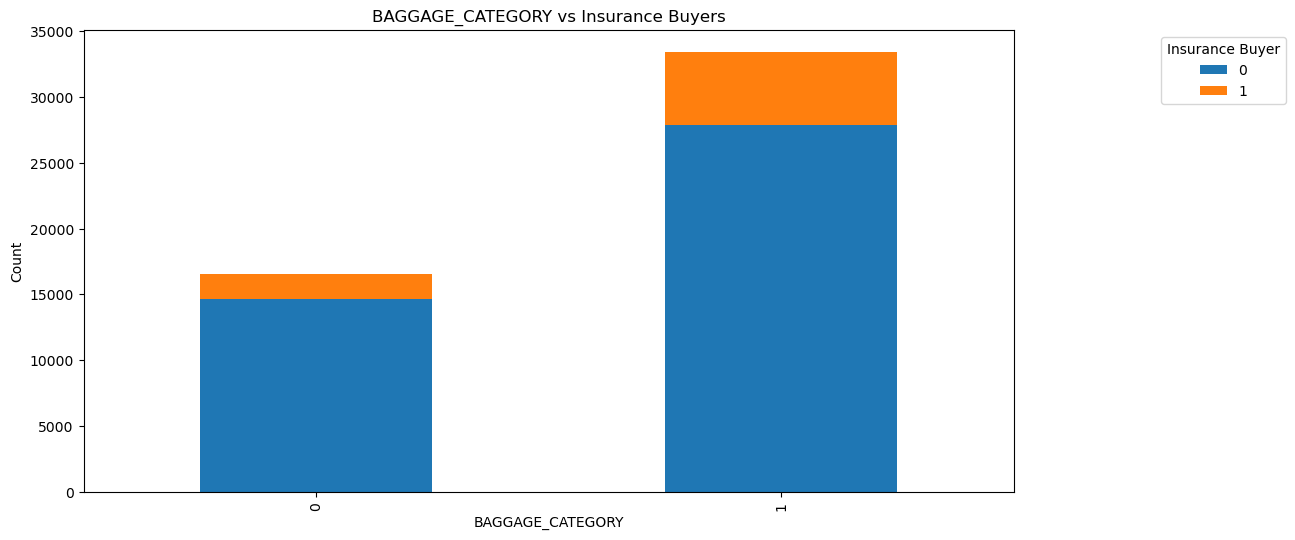

In [53]:
Baggage_INS_FLAG = data.groupby(['BAGGAGE_CATEGORY','INS_FLAG']).size().unstack(fill_value=0)

# Plot the data
Baggage_INS_FLAG.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('BAGGAGE_CATEGORY vs Insurance Buyers')
plt.xlabel('BAGGAGE_CATEGORY')
plt.ylabel('Count')
plt.legend(title='Insurance Buyer', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

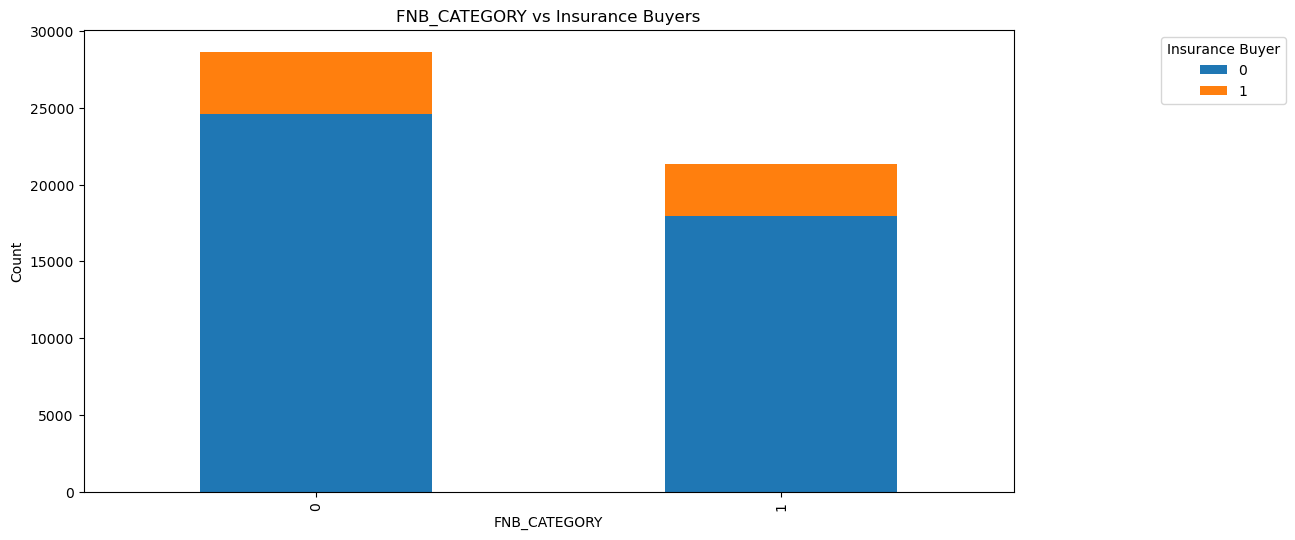

In [56]:
FNB_INS_FLAG = data.groupby(['FNB_CATEGORY','INS_FLAG']).size().unstack(fill_value=0)

# Plot the data
FNB_INS_FLAG.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('FNB_CATEGORY vs Insurance Buyers')
plt.xlabel('FNB_CATEGORY')
plt.ylabel('Count')
plt.legend(title='Insurance Buyer', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

In [69]:
data.columns

Index(['Id', 'PAXCOUNT', 'SALESCHANNEL', 'TRIPTYPEDESC', 'PURCHASELEAD',
       'LENGTHOFSTAY', 'flight_hour', 'flight_day', 'ROUTE',
       'geoNetwork_country', 'BAGGAGE_CATEGORY', 'SEAT_CATEGORY',
       'FNB_CATEGORY', 'INS_FLAG', 'flightDuration_hour'],
      dtype='object')

In [74]:
data["SALESCHANNEL"] = data["SALESCHANNEL"].map({'Internet': 1, 'Mobile': 0})

In [75]:
data["TRIPTYPEDESC"]  = data["TRIPTYPEDESC"].map({'RoundTrip': 1, 'OneWay': 0, 'CircleTrip': 2})

In [76]:
flight_day = pd.get_dummies(data["flight_day"],drop_first=True)
Route = pd.get_dummies(data["ROUTE"],drop_first=True)
Country = pd.get_dummies(data["geoNetwork_country"],drop_first=True)

In [77]:
data.drop(["flight_day","ROUTE","geoNetwork_country"],axis=1,inplace=True)

In [78]:
data = pd.concat([data,flight_day,Route,Country],axis=1)

In [79]:
data.drop(["Id"],axis=1,inplace=True)

In [80]:
x = data.drop(["INS_FLAG"],axis=1)
y = data["INS_FLAG"]

In [82]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [83]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [84]:
rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [85]:
rfc_pred = rfc.predict(test_x)
classification_accuracy = accuracy_score(test_y,rfc_pred)


In [86]:
classification_accuracy

0.8975836321947205

In [87]:
print(classification_report(test_y,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8485
           1       0.91      0.88      0.90      8524

    accuracy                           0.90     17009
   macro avg       0.90      0.90      0.90     17009
weighted avg       0.90      0.90      0.90     17009



<Axes: >

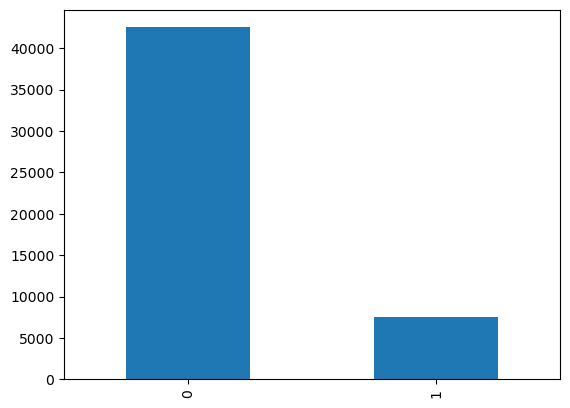

In [96]:
data.INS_FLAG.value_counts().plot(kind="bar")

In [81]:
sm = SMOTE()
x,y = sm.fit_resample(x,y)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [103]:
confusion_matrix(test_y,rfc_pred)

array([[7785,  741],
       [1100, 7383]], dtype=int64)

In [106]:
accuracy_score(test_y,rfc_pred)

0.8917631841966018

In [88]:
import pickle
with open("Travel insurance.pkl","wb") as f:
    pickle.dump(rfc,f)